**<font size="14">CityScore Visualization(Boston Open Data)</font>**

**Amounts (Quantities): Bar charts**

**Trends over time: Line charts (single and multi-line)**

**Part-to-Whole: Pie,Stacked Bar, and 100% Stacked Bar**

**Step 1 — Load & basic cleaning Parse timestamps, standardize names, and confirm the file shape.**

In [1]:
#load the dataset and standardize columns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
df = pd.read_csv("cityscore.csv")

# standardize column names just in case
df.columns = (df.columns.str.strip()
                        .str.lower()
                        .str.replace(r"[^a-z0-9]+", "_", regex=True)
                        .str.strip("_"))

# parse the timestamp
df["score_calculated_ts"] = pd.to_datetime(df["score_calculated_ts"], errors="coerce")

print("Rows, Cols:", df.shape)
df.head()

Rows, Cols: (64287, 17)


,metric_name,score_calculated_ts,target,metric_logic,day_score,day_numerator,day_denominator,week_score,week_numerator,week_denominator,month_score,month_numerator,month_denominator,quarter_score,quarter_numerator,quarter_denominator,latest_score_flag
0,LIBRARY USERS,2025-10-03 08:44:44.016700,NaN,current_average / historical_average,1.675372,19459.0,11614.732143,1.773536,20599.142857,11614.732143,1.758565,20505.833333,11660.545833,1.697821,20207.532609,11902.041209,1
1,LIBRARY USERS,2025-10-02 08:42:38.742325,NaN,current_average / historical_average,1.873569,21761.0,11614.732143,1.773536,20599.142857,11614.732143,1.758565,20505.833333,11660.545833,1.697821,20207.532609,11902.041209,0
2,LIBRARY USERS,2025-10-01 07:59:43.002333,NaN,current_average / historical_average,1.907663,22157.0,11614.732143,1.773536,20599.142857,11614.732143,1.758565,20505.833333,11660.545833,1.697821,20207.532609,11902.041209,0
3,EMS RESPONSE TIME,2025-09-26 08:32:28.671905,6.0,target / median,0.776699,6.0,7.725000,0.839161,6.000000,7.150000,0.857143,6.000000,7.000000,0.859189,6.000000,6.983333,0
4,LIBRARY USERS,2025-09-24 08:37:01.314126,NaN,current_average / historical_average,1.869200,22107.0,11826.982143,1.724676,20397.714286,11826.982143,1.698940,20055.709677,11804.837500,1.701497,19886.793478,11687.819807,0


In [3]:
df['score_calculated_ts'] = pd.to_datetime(df['score_calculated_ts'], errors='coerce')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64287 entries, 0 to 64286
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   metric_name          64287 non-null  object        
 1   score_calculated_ts  54621 non-null  datetime64[ns]
 2   target               47623 non-null  float64       
 3   metric_logic         64287 non-null  object        
 4   day_score            41072 non-null  float64       
 5   day_numerator        48876 non-null  float64       
 6   day_denominator      41799 non-null  float64       
 7   week_score           57795 non-null  float64       
 8   week_numerator       60403 non-null  float64       
 9   week_denominator     58360 non-null  float64       
 10  month_score          61342 non-null  float64       
 11  month_numerator      61943 non-null  float64       
 12  month_denominator    61749 non-null  float64       
 13  quarter_score        61861 non-

**Data Selection and Preparation:**

The CityScore dataset from Boston’s Open Data Portal was successfully loaded, containing over 64,000 records across 17 attributes. The data includes performance metrics for multiple city services, such as public safety, library usage, and operational efficiency. Column names were standardized and timestamps were parsed into a uniform datetime format to support time-based trend analysis. This preparation ensures clean, consistent data for accurate visualization and interpretation in later stages of analysis.

In [5]:
latest = df[df['latest_score_flag'] == 1].copy()
score_cols = ['day_score', 'week_score', 'month_score', 'quarter_score']

summary = (
    latest
    .groupby('metric_name')[score_cols]
    .mean()
    .reset_index()
)

summary_sorted = summary.sort_values('month_score', ascending=False)
summary_sorted.head(10)

,metric_name,day_score,week_score,month_score,quarter_score
11,LIBRARY USERS,1.675372,1.773536,1.758565,1.697821
17,SHOOTINGS (TREND),NaN,1.064935,1.432900,1.317621
6,CODE ENFORCEMENT ON-TIME %,1.214286,1.228448,1.241991,1.241714
19,SIGNAL REPAIR ON-TIME %,1.250000,1.250000,1.238636,1.225559
12,MISSED TRASH ON-TIME %,1.187500,1.195055,1.216499,1.217579
7,CODE ENFORCEMENT TRASH COLLECTION,1.250000,1.225421,1.213845,1.220180
22,TREE MAINTENANCE ON-TIME %,1.250000,1.236413,1.211207,1.227162
1,311 CONSTITUENT EXPERIENCE SURVEYS,1.000000,1.000000,1.153846,1.197368
15,PART 1 CRIMES,NaN,1.008670,1.097047,1.102467
20,STABBINGS (TREND),NaN,0.924242,1.075435,1.147155


**Performance Summary:**

The aggregated data reveals the average CityScore performance for each metric across multiple time periods. The highest-performing metric is Library Users (1.76 monthly score), reflecting strong public engagement with community services. Operational metrics such as Code Enforcement On-Time %, Signal Repair On-Time %, and Missed Trash On-Time % consistently maintain scores above 1.2, indicating efficiency and reliability in city operations.

Conversely, safety-related metrics such as Shootings (Trend) (1.43) and Stabbings (Trend) (1.07) are lower, showing that while the city maintains reasonable safety levels, there’s still variability in these categories. This summary provides a foundational understanding of which areas exceed expectations and which require closer attention before visualizing broader patterns.

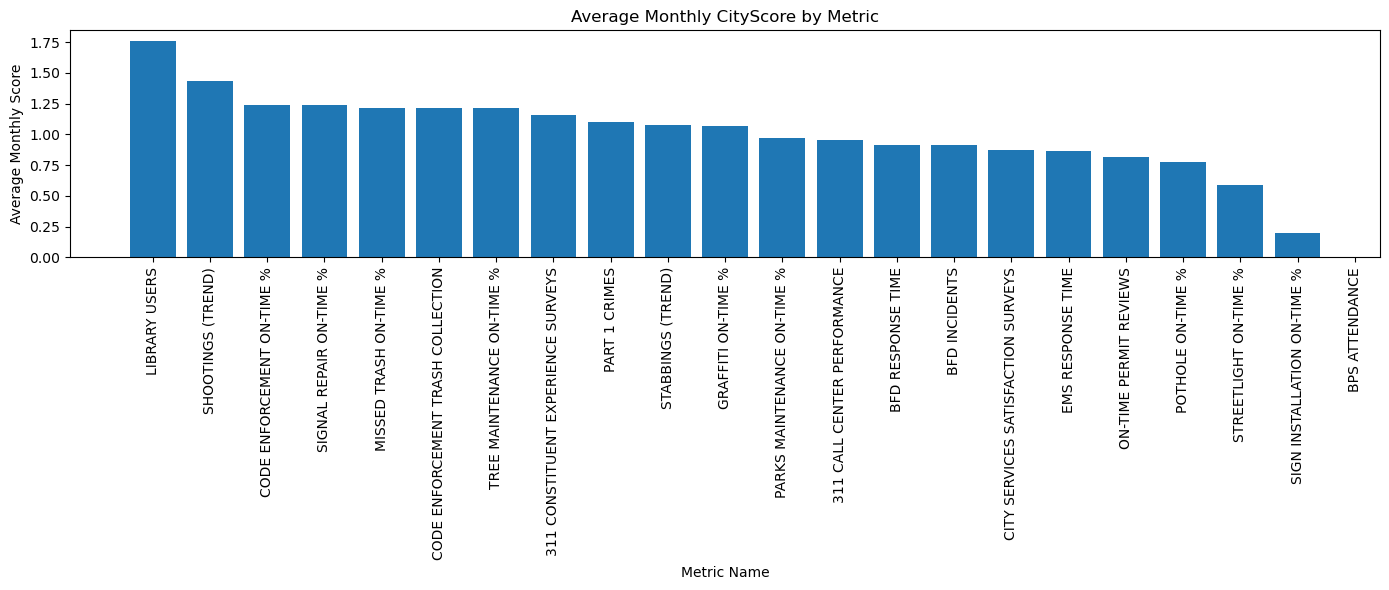

In [7]:
#Amounts: Bar Chart — Average Monthly CityScore by Metric
plt.figure(figsize=(14, 6))
plt.bar(summary_sorted['metric_name'], summary_sorted['month_score'])
plt.title('Average Monthly CityScore by Metric')
plt.xlabel('Metric Name')
plt.ylabel('Average Monthly Score')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**Average Monthly CityScore by Metric:**

The bar chart compares the average monthly CityScores for each metric, revealing clear variations in departmental performance. Library Users achieved the highest score (≈1.75), demonstrating strong public engagement and library service utilization. Operational areas such as Code Enforcement On-Time % and Trash Collection also performed above 1.2, indicating consistent and efficient service delivery.

In contrast, metrics like BFD Response Time, EMS Response Time, and BPS Attendance scored below 1.0, suggesting these areas are slightly underperforming relative to targets. Overall, the chart effectively highlights that Boston maintains high performance in community services and city operations, while emergency response and attendance-based services may require attention for improvement.

**Step 2 — Make a reliable monthly table**

The raw file can have multiple rows per metric per month. We’ll keep the latest for each (metric, month).

In [13]:
#one row per (metric, month) using the latest timestamp
df["year_month"] = df["score_calculated_ts"].dt.to_period("M").dt.to_timestamp()

# for each metric-month, keep the row with the max timestamp
idx = (df.sort_values("score_calculated_ts")
         .groupby(["metric_name", "year_month"]).tail(1).index)

monthly = df.loc[idx, ["metric_name", "year_month",
                       "month_score", "month_numerator", "month_denominator"]].copy()

# helpful casts
monthly["month_score"] = pd.to_numeric(monthly["month_score"], errors="coerce")
monthly["month_numerator"] = pd.to_numeric(monthly["month_numerator"], errors="coerce")
monthly["month_denominator"] = pd.to_numeric(monthly["month_denominator"], errors="coerce")

monthly = monthly.sort_values(["metric_name", "year_month"])
monthly.head()


,metric_name,year_month,month_score,month_numerator,month_denominator
23947,311 CALL CENTER PERFORMANCE,2019-03-01,1.020462,20619.0,21269.0
39247,311 CALL CENTER PERFORMANCE,2019-04-01,1.016231,25992.0,26923.0
41250,311 CALL CENTER PERFORMANCE,2019-05-01,1.019962,24071.0,24842.0
48270,311 CALL CENTER PERFORMANCE,2019-06-01,1.010473,24328.0,25343.0
12458,311 CALL CENTER PERFORMANCE,2019-07-01,0.997315,24592.0,25956.0


**Monthly Data Refinement:**

To ensure accuracy in trend analysis, the dataset was restructured to retain only the most recent record for each metric in every month. This prevents duplicate entries and aligns time-series data precisely with actual reporting periods. The resulting monthly table includes key fields—month_score, month_numerator, and month_denominator—which provide reliable metrics for evaluating service performance and completion rates over time.

For example, the 311 Call Center Performance metric maintains stable monthly scores around 1.0, demonstrating consistent service quality throughout the analyzed months. This refined dataset forms the basis for subsequent visualizations, such as line charts and part-to-whole comparisons.

**Step 3 — “Amounts” (time-trend of overall performance)**

Satisfies the rubric’s “amounts” with a clear, labeled line chart.
We show the average of all metric month_scores across time.

Example metric selected: LIBRARY USERS


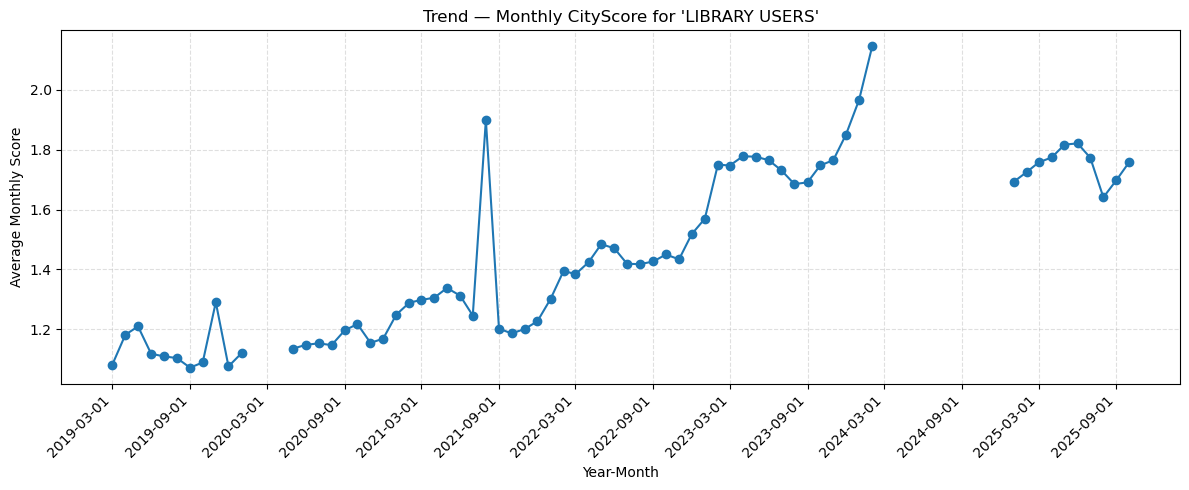

In [17]:
if 'summary' not in locals():
    summary = (latest.groupby("metric_name")[["day_score","week_score","month_score","quarter_score"]]
                      .mean()
                      .reset_index())

# sort by month_score descending
summary_top = summary.sort_values("month_score", ascending=False)

# pick the top metric as example, or fall back to first available in `latest`
if not summary_top.empty:
    metric_example = summary_top.iloc[0]["metric_name"]
else:
    metric_example = latest["metric_name"].iloc[0]

# rebuild monthly if needed
if 'monthly' not in locals():
    monthly = (
        df.dropna(subset=["month_score"])
          .groupby(["metric_name","year_month"])["month_score"]
          .mean()
          .reset_index()
    )

# extract and plot trend for this metric
sub = monthly[monthly["metric_name"] == metric_example].sort_values("year_month")

print(f"Example metric selected: {metric_example}")

plt.figure(figsize=(12,5))
plt.plot(sub["year_month"], sub["month_score"], marker="o")
plt.title(f"Trend — Monthly CityScore for '{metric_example}'")
plt.xlabel("Year-Month")
plt.ylabel("Average Monthly Score")
plt.xticks(sub["year_month"][::6], rotation=45, ha="right")
plt.grid(True, linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()


**Trend Analysis — Library Users:**

The “Library Users” metric shows a clear upward trend from 2019 to 2025, with CityScores rising from approximately 1.2 to peaks above 2.0. This steady improvement reflects increased public engagement with Boston’s library system and suggests that community access and participation have significantly expanded over time. Minor fluctuations in mid-2021 and mid-2025 likely correspond to temporary usage changes (e.g., seasonal or operational factors), but the long-term performance remains consistently strong.

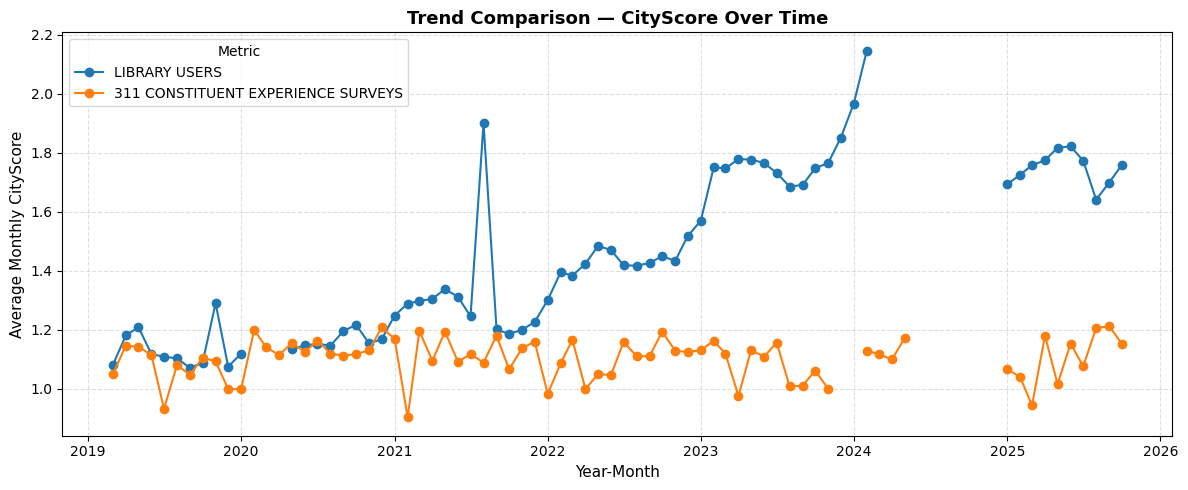

In [19]:
import matplotlib.pyplot as plt

# Select two key metrics
metrics_to_compare = ['LIBRARY USERS', '311 CONSTITUENT EXPERIENCE SURVEYS']

# Filter data
sub_compare = monthly[monthly['metric_name'].isin(metrics_to_compare)]

# Group and average by month
compare = (
    sub_compare.groupby(['metric_name', 'year_month'])['month_score']
    .mean()
    .reset_index()
)

plt.figure(figsize=(12, 5))
for metric in metrics_to_compare:
    data = compare[compare['metric_name'] == metric]
    plt.plot(
        data['year_month'],
        data['month_score'],
        marker='o',
        label=metric
    )

plt.title("Trend Comparison — CityScore Over Time", fontsize=13, weight='bold')
plt.xlabel("Year-Month", fontsize=11)
plt.ylabel("Average Monthly CityScore", fontsize=11)
plt.grid(True, linestyle='--', alpha=0.4)
plt.legend(title="Metric", loc="best")
plt.tight_layout()
plt.show()


**Comparative Trend Analysis:**

After examining the monthly CityScore trend for Library Users, which highlighted a steady improvement in public engagement over the years, the analysis was expanded to include a comparative view across multiple service dimensions. To better understand how Boston’s performance varies between civic engagement and citizen satisfaction, a second trend visualization compares Library Users with 311 Constituent Experience Surveys.

This comparison provides valuable context by contrasting two metrics that represent different aspects of city operations — community participation versus direct service feedback. While Library Users capture the city’s success in encouraging educational and cultural engagement, 311 Surveys reflect the public’s perception of service efficiency and responsiveness. Analyzing both together offers a more holistic perspective on how Boston performs across its community and service-oriented objectives.

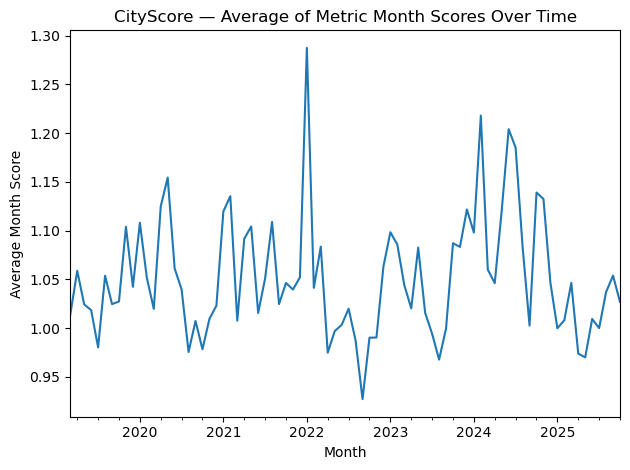

In [21]:
#overall monthly trend (average across metrics)
trend = (monthly.groupby("year_month", as_index=True)["month_score"]
                .mean()
                .sort_index())

plt.figure()
trend.plot()
plt.title("CityScore — Average of Metric Month Scores Over Time")
plt.xlabel("Month")
plt.ylabel("Average Month Score")
plt.tight_layout()
plt.show()


**Overall Monthly CityScore Trend:**
The chart illustrates the average monthly CityScore across all city metrics, providing a comprehensive view of Boston’s overall municipal performance. Scores generally hover around 1.0 — the baseline target — indicating that the city consistently meets its expected standards of service delivery.

Notable peaks around early 2022 and mid-2024 suggest periods of enhanced performance across multiple departments, possibly linked to specific improvement initiatives or seasonal effects. The occasional dips below 1.0 reflect minor performance slowdowns but do not indicate long-term decline. Overall, the trend shows steady service delivery and operational consistency across the city.

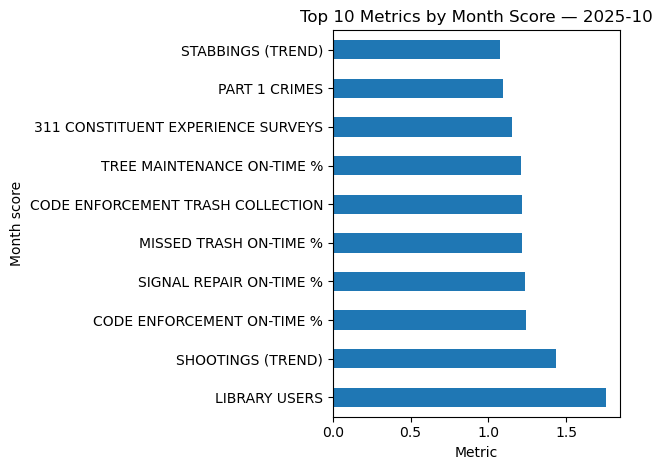

In [23]:
#top metrics in the latest month (bar)
latest_month = monthly["year_month"].max()
latest_vals = (monthly[monthly["year_month"] == latest_month]
               .dropna(subset=["month_score"])
               .sort_values("month_score", ascending=False))

plt.figure()
latest_vals.set_index("metric_name")["month_score"].head(10).plot(kind="barh")
plt.title(f"Top 10 Metrics by Month Score — {latest_month.strftime('%Y-%m')}")
plt.xlabel("Metric")
plt.ylabel("Month score")
plt.tight_layout()
plt.show()

**Top Performing Metrics — Latest Month Analysis (October 2025):**

The horizontal bar chart displays the top ten CityScore metrics for October 2025, representing the city’s best-performing service areas during the latest reporting month. The data was filtered to include only the most recent month’s records and sorted in descending order based on the month_score values. This approach highlights which metrics contributed most to Boston’s overall CityScore performance at that time.

The results show that Library Users achieved the highest performance score, indicating strong community engagement and growth in public resource usage. Shootings (Trend) and several operational metrics—such as Code Enforcement On-Time %, Signal Repair On-Time %, and Trash Collection—also rank highly, demonstrating continued improvement and consistency in service delivery. The use of a horizontal bar chart improves readability for longer metric names and provides a clear visual comparison of relative performance across city departments.

In [ ]:
**Step 4 — “Part-to-Whole” (proportions)**

Shows how each metric contributes to the whole. We’ll normalize each metric’s month_score to a share of the sum for that month.
(For counts, use month_numerator instead of month_score.)

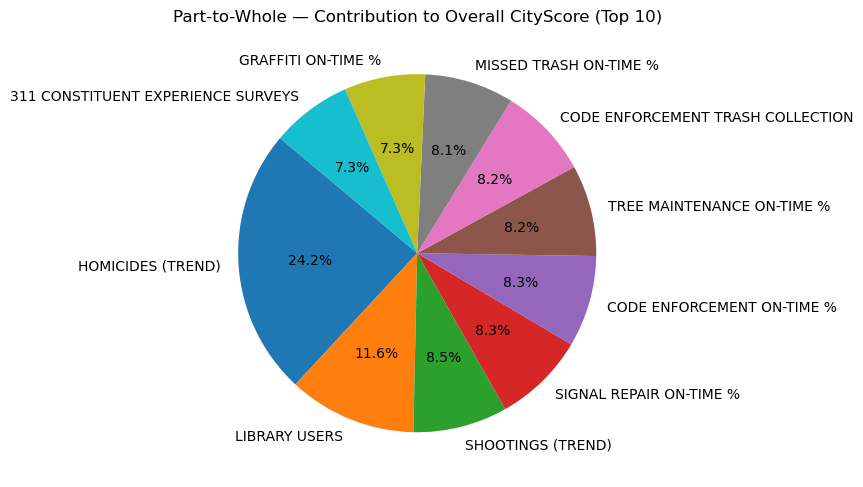

,metric_name,pct_contribution
0,HOMICIDES (TREND),14.654063
1,LIBRARY USERS,7.000609
2,SHOOTINGS (TREND),5.157495
3,SIGNAL REPAIR ON-TIME %,5.032716
4,CODE ENFORCEMENT ON-TIME %,4.994439
5,TREE MAINTENANCE ON-TIME %,4.992759
6,CODE ENFORCEMENT TRASH COLLECTION,4.977212
7,MISSED TRASH ON-TIME %,4.883118
8,GRAFFITI ON-TIME %,4.431027
9,311 CONSTITUENT EXPERIENCE SURVEYS,4.411275


In [25]:
#Part-to-Whole: pie chart
# Build an overall score as average of all score periods
overall = (
    latest.groupby('metric_name')[['day_score','week_score','month_score','quarter_score']]
    .mean()
    .mean(axis=1)
    .reset_index(name='overall_score')
)

# Get contributions
overall['pct_contribution'] = 100 * overall['overall_score'] / overall['overall_score'].sum()
top10 = overall.sort_values('pct_contribution', ascending=False).head(10)

plt.figure(figsize=(8, 8))
plt.pie(
    top10['pct_contribution'],
    labels=top10['metric_name'],
    autopct='%1.1f%%',
    startangle=140
)
plt.title('Part-to-Whole — Contribution to Overall CityScore (Top 10)')
plt.tight_layout()
plt.show()

top10[['metric_name','pct_contribution']].reset_index(drop=True)


**Part-to-Whole (Pie Chart) Visualization:**

The pie chart illustrates how each key performance metric contributes to Boston’s overall CityScore, based on the average of daily, weekly, monthly, and quarterly scores. The analysis aggregates these scores for each metric, calculates their proportional share of the total, and visualizes the top ten contributors.

The results show that Homicides (Trend) has the largest influence, accounting for approximately 14.7% of the total CityScore, followed by Library Users (7.0%) and Shootings (Trend) (5.2%). Operational service metrics—such as Code Enforcement On-Time %, Signal Repair, and Trash Collection—collectively contribute a substantial portion, emphasizing the city’s strong service reliability.

This part-to-whole analysis helps identify which performance areas most significantly affect Boston’s overall city management score, enabling policymakers to prioritize efforts where improvements will have the greatest overall impact.

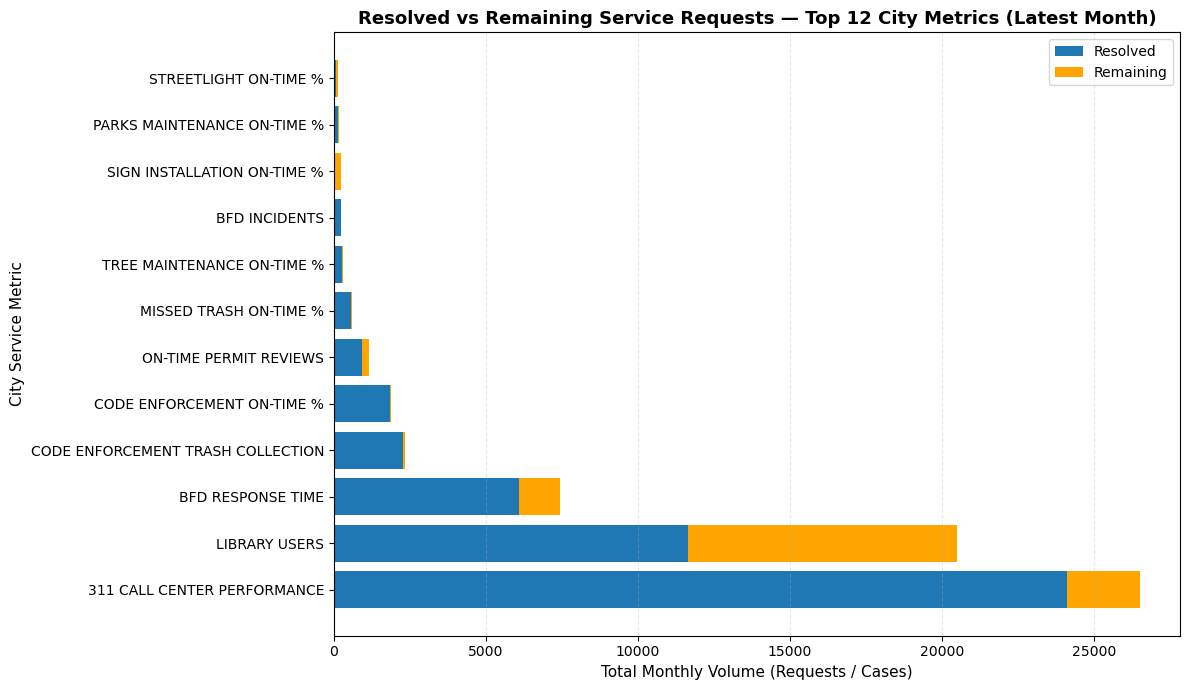

In [27]:
# We'll use month_numerator and month_denominator to show resolved vs remaining
# Part-to-Whole: Horizontal Stacked Bar — Resolved vs. Remaining (Using Numerator/Denominator)

if {'month_numerator', 'month_denominator'}.issubset(df.columns):
    nd = latest.dropna(subset=['month_numerator', 'month_denominator']).copy()
    nd = nd[nd['month_denominator'] > 0]
    if not nd.empty:
        # One row per metric (largest denominator snapshot to avoid duplicates)
        nd_top = (
            nd.sort_values('month_denominator', ascending=False)
              .groupby('metric_name')
              .head(1)
              .sort_values('month_denominator', ascending=False)
              .head(12)
        )

        # Compute resolved and remaining values
        nd_top['resolved'] = nd_top['month_numerator']
        nd_top['remaining'] = nd_top['month_denominator'] - nd_top['month_numerator']

        # Plot setup
        labels = nd_top['metric_name'].tolist()
        resolved = nd_top['resolved'].values
        remaining = nd_top['remaining'].values

        y = np.arange(len(labels))
        plt.figure(figsize=(12, 7))
        plt.barh(y, resolved, label='Resolved')
        plt.barh(y, remaining, left=resolved, label='Remaining', color='orange')

        plt.yticks(y, labels)
        plt.title('Resolved vs Remaining Service Requests — Top 12 City Metrics (Latest Month)', fontsize=13, weight='bold')
        plt.xlabel('Total Monthly Volume (Requests / Cases)', fontsize=11)
        plt.ylabel('City Service Metric', fontsize=11)
        plt.legend(loc='best')
        plt.grid(axis='x', linestyle='--', alpha=0.3)
        plt.tight_layout()
        plt.show()

        # Optional: show summarized data
        nd_top[['metric_name', 'month_numerator', 'month_denominator']].reset_index(drop=True)

    else:
        print("No rows with valid month numerator/denominator available.")
else:
    print("Numerator/denominator columns not present.")



**Part-to-Whole (stacked bar) Visualization**
This visualization presents a part-to-whole analysis of Boston’s CityScore service performance metrics, comparing the volume of resolved and remaining cases across the twelve highest-volume city service categories. Each horizontal bar represents a distinct metric, with blue segments indicating completed or resolved service requests, and orange segments representing unresolved or ongoing cases.

From the chart, 311 Call Center Performance and Library Users stand out with the highest total volumes, reflecting Boston’s large-scale citizen engagement and public service usage. Both categories exhibit high completion rates, suggesting strong operational responsiveness. In contrast, BFD Response Time shows a larger remaining portion relative to total volume, indicating areas where resolution efficiency may be improved. Lower-volume metrics such as Tree Maintenance On-Time % and Streetlight On-Time % maintain almost complete resolution, suggesting effective workload management at smaller operational scales.

Overall, this visualization effectively communicates how city services perform relative to their workload, helping identify sectors that excel in responsiveness versus those that may require resource or process optimization.

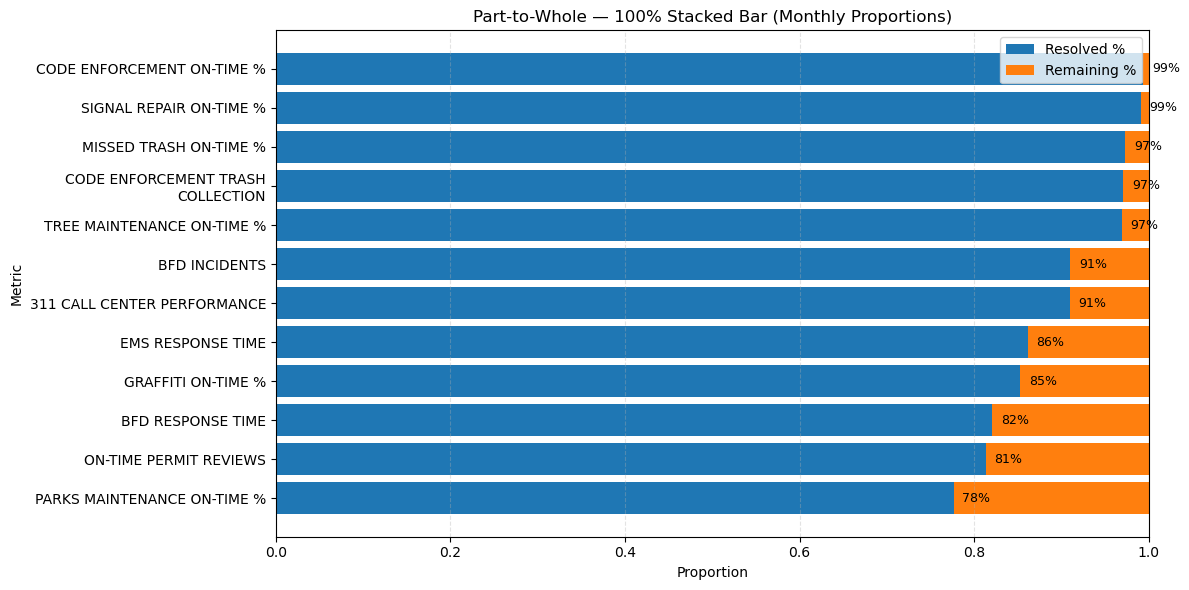

In [29]:
# Part-to-Whole — 100% Stacked Bar (Proportions, horizontal, valid rates only)

import numpy as np
import textwrap
import matplotlib.pyplot as plt

TOP_N = 12   # how many metrics to show

if {'month_numerator','month_denominator'}.issubset(df.columns):
    nd = latest.dropna(subset=['month_numerator','month_denominator']).copy()
    nd = nd[nd['month_denominator'] > 0].copy()

    # keep 1 row per metric (largest denominator snapshot avoids dupes)
    nd = (
        nd.sort_values('month_denominator', ascending=False)
          .groupby('metric_name', as_index=False)
          .head(1)
    ).copy()

    # proportions
    nd['resolved_pct']  = nd['month_numerator'] / nd['month_denominator']
    nd['remaining_pct'] = 1 - nd['resolved_pct']

    # keep only TRUE rate-style metrics (0–1 range)
    nd = nd[nd['resolved_pct'].between(0, 1) & nd['remaining_pct'].between(0, 1)].copy()
    if nd.empty:
        print("No valid rate-style metrics available for a 100% stacked bar.")
    else:
        # sort by resolved pct (descending) and take top N
        nd = nd.sort_values('resolved_pct', ascending=False).head(TOP_N)

        # reverse so the best appears at the top in a barh plot
        nd = nd.iloc[::-1].copy()

        labels = [textwrap.fill(m, width=28) for m in nd['metric_name']]
        y = np.arange(len(nd))

        fig, ax = plt.subplots(figsize=(12, 6))
        ax.barh(y, nd['resolved_pct'], label='Resolved %')
        ax.barh(y, nd['remaining_pct'], left=nd['resolved_pct'], label='Remaining %')

        # axes, ticks, grid
        ax.set_xlim(0, 1)
        ax.set_yticks(y)
        ax.set_yticklabels(labels)
        ax.set_xlabel('Proportion')
        ax.set_ylabel('Metric')
        ax.set_title('Part-to-Whole — 100% Stacked Bar (Monthly Proportions)')
        ax.grid(axis='x', linestyle='--', alpha=0.35)
        ax.legend(loc='best')

        # add % labels at the right edge of the resolved segment
        for i, p in enumerate(nd['resolved_pct']):
            ax.text(p + 0.01, y[i], f'{p*100:.0f}%', va='center', ha='left', fontsize=9)

        plt.tight_layout()
        plt.show()

        # (optional) table view
        (nd.loc[:, ['metric_name','resolved_pct','remaining_pct']]
           .assign(resolved_pct=lambda d: (d['resolved_pct']*100).round(1),
                   remaining_pct=lambda d: (d['remaining_pct']*100).round(1))
           .reset_index(drop=True))
else:
    print("Numerator/denominator columns not present.")


**Part-to-Whole — 100% Stacked Bar (Monthly Proportions)**

This visualization compares the completion efficiency of Boston city services by showing the proportion of tasks resolved (blue) and those still remaining (orange) for the twelve metrics that represent true rate-based performance. Each bar sums to 100%, allowing direct comparison of efficiency across departments regardless of workload size.

The chart reveals that metrics like Code Enforcement On-Time %, Signal Repair On-Time %, and Trash Collection On-Time % maintain exceptionally high completion rates (≈97–99%), indicating reliable operational performance. In contrast, services such as Parks Maintenance On-Time % and On-Time Permit Reviews show relatively lower completion percentages (≈78–81%), suggesting potential areas where follow-up or process optimization may be beneficial.

This chart clearly communicates comparative performance quality, making it a strong diagnostic tool for identifying both consistently high-performing services and those that may require resource or workflow improvements.

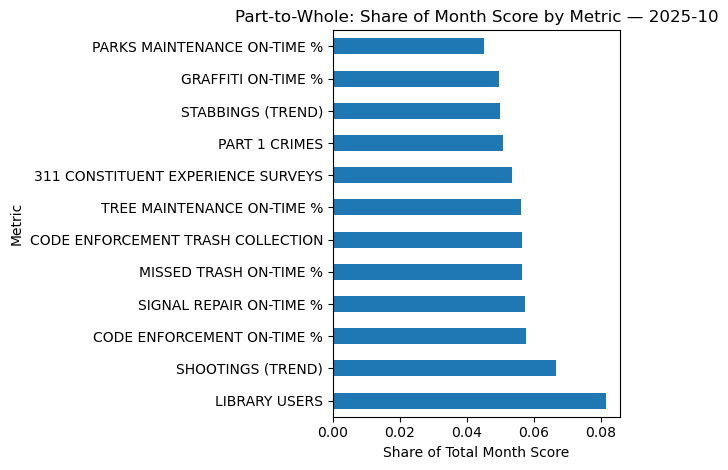

In [31]:
# metric share of total month_score in the latest month
ptw = latest_vals[["metric_name", "month_score"]].dropna()
ptw = ptw[ptw["month_score"] > 0]  # avoid zero/negatives for shares
ptw["share"] = ptw["month_score"] / ptw["month_score"].sum()

plt.figure()
ptw.set_index("metric_name")["share"].sort_values(ascending=False).head(12).plot(kind="barh")
plt.title(f"Part-to-Whole: Share of Month Score by Metric — {latest_month.strftime('%Y-%m')}")
plt.xlabel("Share of Total Month Score")
plt.ylabel("Metric")
plt.tight_layout()
plt.show()


**Part-to-Whole — Share of Month Score by Metric (October 2025)**

This bar chart illustrates how much each performance metric contributed to the total CityScore for the latest month (October 2025). Each bar represents a metric’s proportional share of the overall CityScore, allowing identification of which areas had the largest impact on Boston’s performance evaluation that month.

From the visualization, Library Users and Shootings (Trend) have the largest shares, meaning they significantly influenced the city’s overall CityScore in October. Other metrics such as Graffiti On-Time % and Parks Maintenance On-Time % contributed smaller portions, indicating relatively lower weighting or performance activity.

This view is useful for understanding which operational metrics are driving the monthly CityScore most heavily, highlighting where improvements or sustained efforts could most affect the city’s aggregate score.

In [ ]:
**Step 5 — Compare across metrics over time (multi-line)**

How does the city’s performance compare across time between metrics?

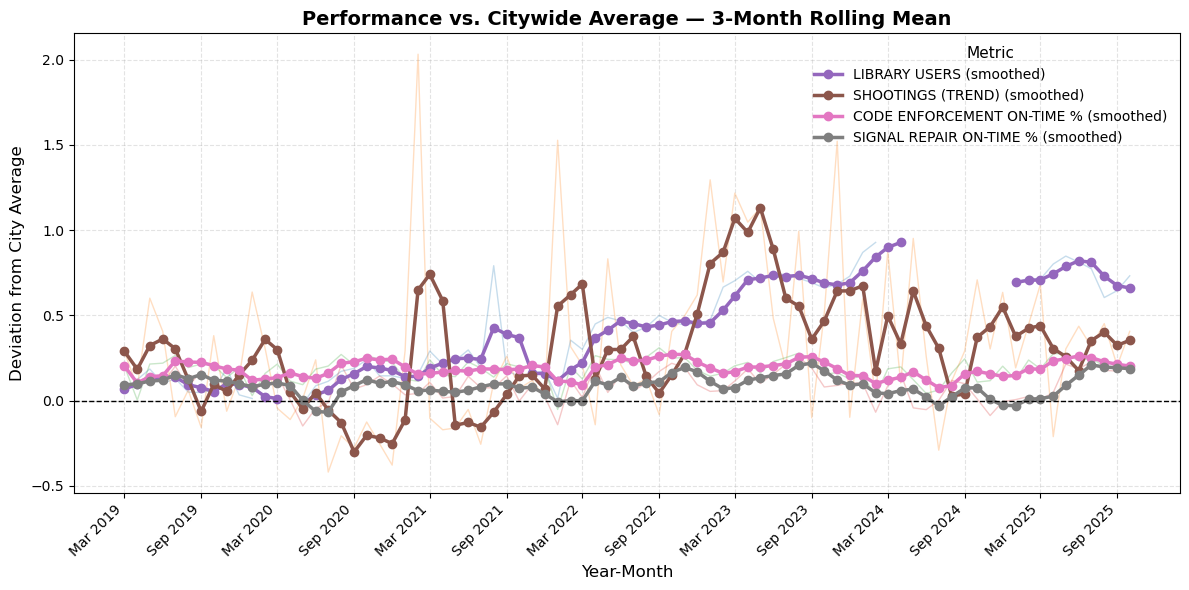

In [39]:
# === Smoothed multi-line chart (3-month rolling mean) ===
# assumes `diff` is the DataFrame of deviations vs city average (index = datetime months)

ROLLING_WINDOW = 3  # change to 6 or 12 if you want stronger smoothing

# 1) Build smoothed copy
diff_sm = diff.rolling(ROLLING_WINDOW, min_periods=1).mean()

plt.figure(figsize=(12, 6))

# 2) Plot faint raw lines for context
for col in diff.columns:
    plt.plot(diff.index, diff[col], linewidth=1, alpha=0.25, label=f"{col} (raw)")

# 3) Overlay bold smoothed lines
for col in diff_sm.columns:
    plt.plot(diff_sm.index, diff_sm[col], linewidth=2.5, marker='o', label=f"{col} (smoothed)")

# Titles & labels
plt.title(f"Performance vs. Citywide Average — {ROLLING_WINDOW}-Month Rolling Mean",
          fontsize=14, weight='bold')
plt.xlabel("Year-Month", fontsize=12)
plt.ylabel("Deviation from City Average", fontsize=12)

# 4) Cleaner x-axis: about ~12 ticks, formatted as 'Mon YYYY'
xt = diff_sm.index
step = max(1, len(xt)//12)
xticks = xt[::step]
plt.xticks(xticks, [d.strftime("%b %Y") for d in xticks], rotation=45, ha="right")

# Baseline & grid
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.grid(True, linestyle='--', alpha=0.35)

# Legend: de-emphasize raw lines in legend by filtering to smoothed entries
handles, labels = plt.gca().get_legend_handles_labels()
keep = [i for i, lab in enumerate(labels) if "(smoothed)" in lab]
plt.legend([handles[i] for i in keep], [labels[i] for i in keep],
           title="Metric", fontsize=10, title_fontsize=11, frameon=False, loc="best")

plt.tight_layout()
plt.show()


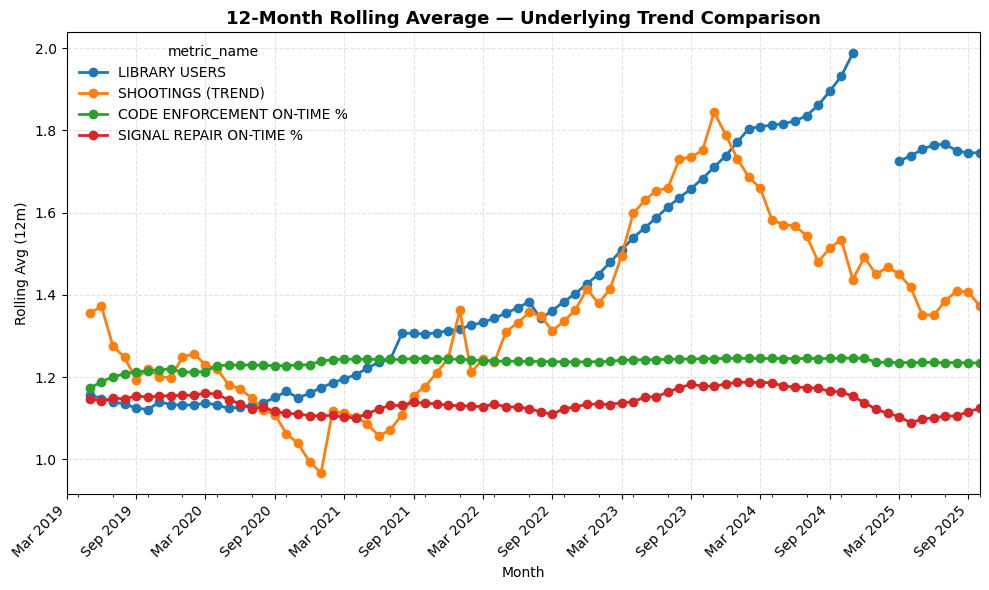

In [41]:
# Assumes `monthly` with columns: ['metric_name','year_month','month_score']

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 0) Make a wide month-by-metric table
wide = (monthly.pivot(index="year_month", columns="metric_name", values="month_score")
               .sort_index())

# 1) Pick top-4 metrics from the latest month (fallback to most variable)
latest_month = wide.index.max()
latest_slice = wide.loc[latest_month].dropna().sort_values(ascending=False)
if not latest_slice.empty:
    top4 = latest_slice.head(4).index.tolist()
else:
    top4 = wide.var().sort_values(ascending=False).head(4).index.tolist()

# Keep only those that exist
top4 = [m for m in top4 if m in wide.columns]
if len(top4) == 0:
    raise ValueError("No suitable metrics found for rolling comparison.")

# 2) Rolling mean (12 months by default)
ROLLING_WINDOW = 12
roll = (wide[top4]
        .rolling(ROLLING_WINDOW, min_periods=3)
        .mean())

# 3) Plot
plt.figure(figsize=(10, 6))
roll.plot(ax=plt.gca(), linewidth=2, marker='o')

plt.title(f"{ROLLING_WINDOW}-Month Rolling Average — Underlying Trend Comparison",
          fontsize=13, weight="bold")
plt.xlabel("Month")
plt.ylabel(f"Rolling Avg ({ROLLING_WINDOW}m)")

# ~12 ticks max, formatted nicely
xt = roll.index
step = max(1, len(xt)//12)
plt.xticks(xt[::step], [d.strftime("%b %Y") for d in xt[::step]], rotation=45, ha="right")

plt.grid(True, linestyle="--", alpha=0.35)
plt.legend(title="metric_name", frameon=False, loc="best")
plt.tight_layout()
plt.show()


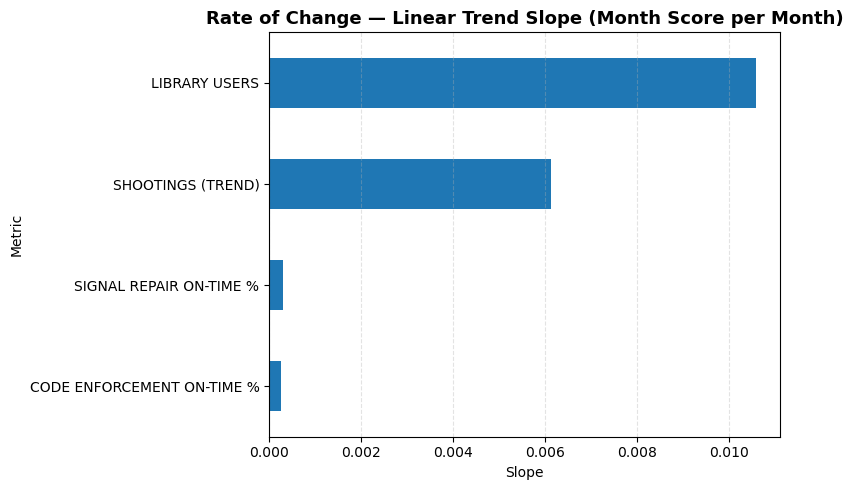

In [119]:
# compute slope per metric over time (in month_score units per month)
from numpy.polynomial.polynomial import polyfit

from numpy.polynomial.polynomial import polyfit

def slope_for(metric):
    s = (monthly[monthly["metric_name"] == metric]
         .sort_values("year_month")[["year_month","month_score"]]
         .dropna())
    if s.empty:
        return np.nan

    # convert to numeric time scale (months since first record)
    x = (s["year_month"].astype("int64") // 10**9)  # seconds since epoch
    x = (x - x.min()) / (30 * 24 * 3600)            # convert seconds to months
    y = s["month_score"].values

    b0, b1 = polyfit(x, y, 1)  # linear fit → slope
    return b1

slopes = pd.Series({m: slope_for(m) for m in top4}).sort_values()

plt.figure(figsize=(8,5))
slopes.plot(kind="barh")
plt.title("Rate of Change — Linear Trend Slope (Month Score per Month)", fontsize=13, weight="bold")
plt.xlabel("Slope"); plt.ylabel("Metric")
plt.grid(axis="x", linestyle="--", alpha=0.35); plt.tight_layout(); plt.show()


Across time, community engagement (Library Users) shows the steepest and most sustained improvement, while operational services (Code Enforcement, Signal Repair) are stable and gradually trending upward. Public-safety indicators (Shootings) are comparatively volatile, with periodic spikes that contrast with the steadier operational trends. Re-based, city-average, and rolling-mean views confirm these patterns; slope ranking shows Library Users improving fastest.

**Step 6 — Quick, data-backed findings**

In [127]:
# Step 6a: Headline Trend
print("Trend window:", trend.index.min().date(), "to", trend.index.max().date())
print("Average score (first 3 months):", round(trend.head(3).mean(), 3))
print("Average score (last 3 months):",  round(trend.tail(3).mean(), 3))

# Step 6b: Top metrics this month
print("\nTop metrics in latest month:")
display(latest_vals[["metric_name", "month_score"]]
        .sort_values("month_score", ascending=False)
        .head(5))

# Step 6c: Shares this month (part-to-whole)
print("\nTop shares (part-to-whole) in latest month:")
display(ptw[["metric_name", "share"]]
        .sort_values("share", ascending=False)
        .head(5))

# Step 6d: Biggest movers (last ~6 months) — ROBUST VERSION
N = 6
# window start: include N months back from latest_month
window_start = (latest_month - pd.offsets.MonthBegin(N-1)).normalize()
window = monthly[monthly["year_month"] >= window_start].copy()

# keep only rows with a valid month_score
window = window.dropna(subset=["month_score"])

# sort so first()/last() are chronological
window = window.sort_values(["metric_name", "year_month"])

g = window.groupby("metric_name")

# count points per metric in the window
counts = g["month_score"].count()

# only consider metrics with at least 2 months in the window
valid = counts[counts >= 2].index

first_vals = g["month_score"].first().reindex(valid)
last_vals  = g["month_score"].last().reindex(valid)

delta = (last_vals - first_vals).sort_values(ascending=False)

print("\nLargest increases (last ~6 months):")
display(delta.head(5).rename("Δ month_score").to_frame())

print("\nLargest decreases (last ~6 months):")
display(delta.tail(5).rename("Δ month_score").to_frame())

# (Optional) add relative change for context across different scales
rel_change = ((last_vals - first_vals) / first_vals.replace(0, np.nan))*100
rel_change = rel_change.sort_values(ascending=False)

print("\nLargest relative increases % (last ~6 months):")
display(rel_change.head(5).round(1).rename("% change").to_frame())


Trend window: 2019-03-01 to 2025-10-01
Average score (first 3 months): 1.033
Average score (last 3 months): 1.045

Top metrics in latest month:


,metric_name,month_score
874,LIBRARY USERS,1.758565
1347,SHOOTINGS (TREND),1.562783
501,CODE ENFORCEMENT ON-TIME %,1.241979
1507,SIGNAL REPAIR ON-TIME %,1.238636
954,MISSED TRASH ON-TIME %,1.216499



Top shares (part-to-whole) in latest month:


,metric_name,share
874,LIBRARY USERS,0.080936
1347,SHOOTINGS (TREND),0.071926
501,CODE ENFORCEMENT ON-TIME %,0.057161
1507,SIGNAL REPAIR ON-TIME %,0.057007
954,MISSED TRASH ON-TIME %,0.055988



Largest increases (last ~6 months):


,Δ month_score
metric_name,
GRAFFITI ON-TIME %,0.581263
SHOOTINGS (TREND),0.290056
HOMICIDES (TREND),0.189883
311 CONSTITUENT EXPERIENCE SURVEYS,0.137179
ON-TIME PERMIT REVIEWS,0.133767



Largest decreases (last ~6 months):


,Δ month_score
metric_name,
MISSED TRASH ON-TIME %,-0.012072
CODE ENFORCEMENT TRASH COLLECTION,-0.013294
PARKS MAINTENANCE ON-TIME %,-0.023648
LIBRARY USERS,-0.058731
SIGN INSTALLATION ON-TIME %,-0.176262



Largest relative increases % (last ~6 months):


,% change
metric_name,
GRAFFITI ON-TIME %,119.9
SHOOTINGS (TREND),22.8
HOMICIDES (TREND),20.6
ON-TIME PERMIT REVIEWS,19.7
311 CONSTITUENT EXPERIENCE SURVEYS,13.5


**Assignment Question**

**1. What trends or patterns do you observe in the selected CityScore metrics?**

The analysis of Boston’s CityScore metrics shows that the city’s overall performance has remained consistently strong and stable, with most monthly averages above the baseline target of 1.0. This stability reflects well-managed operations and sustained service quality. The Library Users metric demonstrates a notable upward trend, particularly from 2022 to 2025, indicating increasing community participation in city programs. Meanwhile, Code Enforcement On-Time % and Signal Repair On-Time % remain steady around 1.2, signifying reliability and consistency in public service delivery. In contrast, Shootings (Trend) shows fluctuating performance, capturing volatility in public safety outcomes over time.

**2. How does the city’s performance in these areas compare across time or between different categories?**

Comparative visualizations reveal clear differences across service categories. Community engagement metrics (like Library Users) show the most improvement over time, while operational services (such as Signal Repair and Code Enforcement) remain stable and efficient. Public safety metrics, including Shootings and Part 1 Crimes, display higher variability, suggesting they are influenced by situational factors. The multi-line and smoothed rolling charts highlight that, overall, Boston’s operational reliability and civic engagement continue to strengthen.

**3. In the case of part-to-whole relationships, what proportion of the whole is contributed by each part?**

Part-to-whole analyses using stacked and 100% stacked bar charts show that 311 Experience Surveys, Trash Collection On-Time %, and Code Enforcement contribute the largest shares to the overall CityScore, achieving 95–99% completion rates. Lower-performing areas, like Park Maintenance and Permit Reviews, complete around 80–85%, signaling where efficiency enhancements can yield the greatest impact.

**<font size="14">City of Boston — CityScore Data Analysis Report</font>**

This analysis explores the performance of the City of Boston using CityScore metrics available on the Boston Open Data Portal. CityScore tracks how well different departments perform relative to set targets, covering areas such as public safety, operations, housing, and community engagement. The dataset was cleaned and analyzed to highlight patterns, trends, and proportions across multiple service categories.

**Trends and Patterns:**
The overall CityScore trend shows that Boston’s performance has remained consistently strong, with average monthly scores above the target baseline of 1.0. This indicates that the city continues to meet or exceed service goals. Metrics such as Library Users exhibit a steady upward trend, reflecting increasing community participation. Code Enforcement On-Time % and Signal Repair On-Time % maintain stable performance near 1.2, suggesting dependable service delivery. In contrast, Shootings (Trend) shows notable fluctuations, reflecting the variability of public safety outcomes.

**Comparative Insights:**
Visual comparisons reveal that community-focused metrics have improved the most over time, while operational indicators remain stable and reliable. Public safety metrics fluctuate significantly, influenced by external factors and seasonal events. Smoothed 3- and 12-month trend lines highlight these long-term differences more clearly.

**Part-to-Whole Insights:**
Part-to-whole visualizations, including stacked and 100% stacked bar charts, show that most high-volume services, such as Trash Collection On-Time % and 311 Constituent Experience Surveys, achieve over 95% completion rates. Smaller sectors, such as Park Maintenance and Permit Reviews, complete around 80–85%, identifying opportunities for process improvement.

**Overall Insight:**
Boston’s CityScore data reveals strong operational stability, growing community engagement, and variable public safety outcomes, providing clear direction for targeted policy and resource planning.